# **An Autoregressive and Moving Average Time Series Model**


## **Approach**

* Read the data.
* Preprocess the data.
* Perform Exploratory Data Analysis (EDA).
* Check for stationarity in the data.
* Analyze ACF and PACF plots.
* Build the following models:
    * Moving average (MA).
    * First order autoregressive (AR).
    * Second/general order autoregressive (AR).
    * Third order autoregressive (AR).
    * Fourth order autoregressive (AR).
* Evaluate the models' performance.


## **Install Packages**

In [2]:
# ignore warnings
import warnings
warnings.filterwarnings('ignore')

## **Import libraries**

In [25]:
#importing all required libraries
import pandas as pd
import numpy as np
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller,kpss
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.ar_model import AutoReg
from sklearn.metrics import mean_squared_error
from pandas.plotting import autocorrelation_plot
import scipy.stats
import pylab
import seaborn as sns

In [6]:
#read the data
data = pd.read_csv('./data/Data-Chillers.csv')
df = data.copy()

## **Exploratory Data Analysis**

In [7]:
#checking first five rows of the data
df.head()

,time,IOT_Sensor_Reading,Error_Present,Sensor_2,Sensor_Value
0,29-08-2017 11:00,-0.015871,0.353986,-0.787655,0.008144
1,29-08-2017 12:00,-0.101576,0.353986,-0.787655,-0.029860
2,29-08-2017 13:00,-0.118241,0.353986,-0.787655,-0.021717
3,29-08-2017 14:00,-0.214262,0.353986,-0.787655,0.008144
4,29-08-2017 15:00,-0.249972,0.353986,-0.787655,-0.108583


In [8]:
df.shape

(1895, 5)

In [9]:
# checking the structure of data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1895 entries, 0 to 1894
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   time                1895 non-null   object 
 1   IOT_Sensor_Reading  1895 non-null   float64
 2   Error_Present       1895 non-null   float64
 3   Sensor_2            1895 non-null   float64
 4   Sensor_Value        1895 non-null   float64
dtypes: float64(4), object(1)
memory usage: 74.1+ KB


In [10]:
#checking missing values
df.isnull().sum()

time                  0
IOT_Sensor_Reading    0
Error_Present         0
Sensor_2              0
Sensor_Value          0
dtype: int64

In [13]:
df.time

0       29-08-2017 11:00
1       29-08-2017 12:00
2       29-08-2017 13:00
3       29-08-2017 14:00
4       29-08-2017 15:00
              ...       
1890    16-11-2017 20:00
1891    16-11-2017 21:00
1892    16-11-2017 22:00
1893    16-11-2017 23:00
1894    17-11-2017 00:00
Name: time, Length: 1895, dtype: object

In [14]:
#converting date column into timestamp format
df.time = pd.to_datetime(df.time, format='%d-%m-%Y %H:%M')

In [20]:
#max data in the dataset
df['time'].max()

Timestamp('2017-11-17 00:00:00')

In [21]:
#min date
df['time'].min()

Timestamp('2017-08-29 11:00:00')

In [18]:
#max date ibda dataset
df['time'].max()-df['time'].min()

Timedelta('79 days 13:00:00')

**Dataset has 79 days of data from Aug 2017 to Nov 2017**

In [22]:
# checking the structure of data after converting datetime format
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1895 entries, 0 to 1894
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   time                1895 non-null   datetime64[ns]
 1   IOT_Sensor_Reading  1895 non-null   float64       
 2   Error_Present       1895 non-null   float64       
 3   Sensor_2            1895 non-null   float64       
 4   Sensor_Value        1895 non-null   float64       
dtypes: datetime64[ns](1), float64(4)
memory usage: 74.1 KB


In [38]:
df.corr()

,IOT_Sensor_Reading,Error_Present,Sensor_2,Sensor_Value
IOT_Sensor_Reading,1.000000,-0.225237,0.192791,0.537485
Error_Present,-0.225237,1.000000,0.043020,-0.229122
Sensor_2,0.192791,0.043020,1.000000,0.240710
Sensor_Value,0.537485,-0.229122,0.240710,1.000000


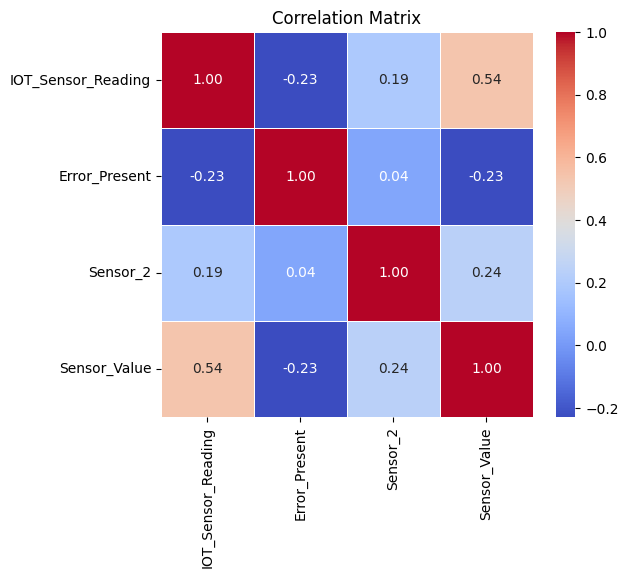

In [37]:
#correlation with other features:
corr_matrix = 
plt.figure(figsize=(6, len(df.columns)))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

In [61]:
df

,time,IOT_Sensor_Reading,Error_Present,Sensor_2,Sensor_Value
0,2017-08-29 11:00:00,-0.015871,0.353986,-0.787655,0.008144
1,2017-08-29 12:00:00,-0.101576,0.353986,-0.787655,-0.029860
2,2017-08-29 13:00:00,-0.118241,0.353986,-0.787655,-0.021717
3,2017-08-29 14:00:00,-0.214262,0.353986,-0.787655,0.008144
4,2017-08-29 15:00:00,-0.249972,0.353986,-0.787655,-0.108583
...,...,...,...,...,...
1890,2017-11-16 20:00:00,1.186376,-0.849566,-0.853293,0.152016
1891,2017-11-16 21:00:00,1.182408,-0.849566,-0.853293,0.114012
1892,2017-11-16 22:00:00,0.934023,-0.849566,-0.853293,0.084152
1893,2017-11-16 23:00:00,0.572952,-0.849566,-0.853293,0.016287


**There are no significant relationship of target variable 'IOT_Sensor_Reading' with other variables.**

In [78]:
def plot_var(df, col_exclude):
    for col in df.columns:
        if (col !=col_exclude):
            df[col].plot(figsize=(20,20/3), title=col)
            plt.xlabel('Data Point')  # Assuming the x-axis represents time
            plt.ylabel('Value')  # Assuming the y-axis represents the variable value
            plt.show()

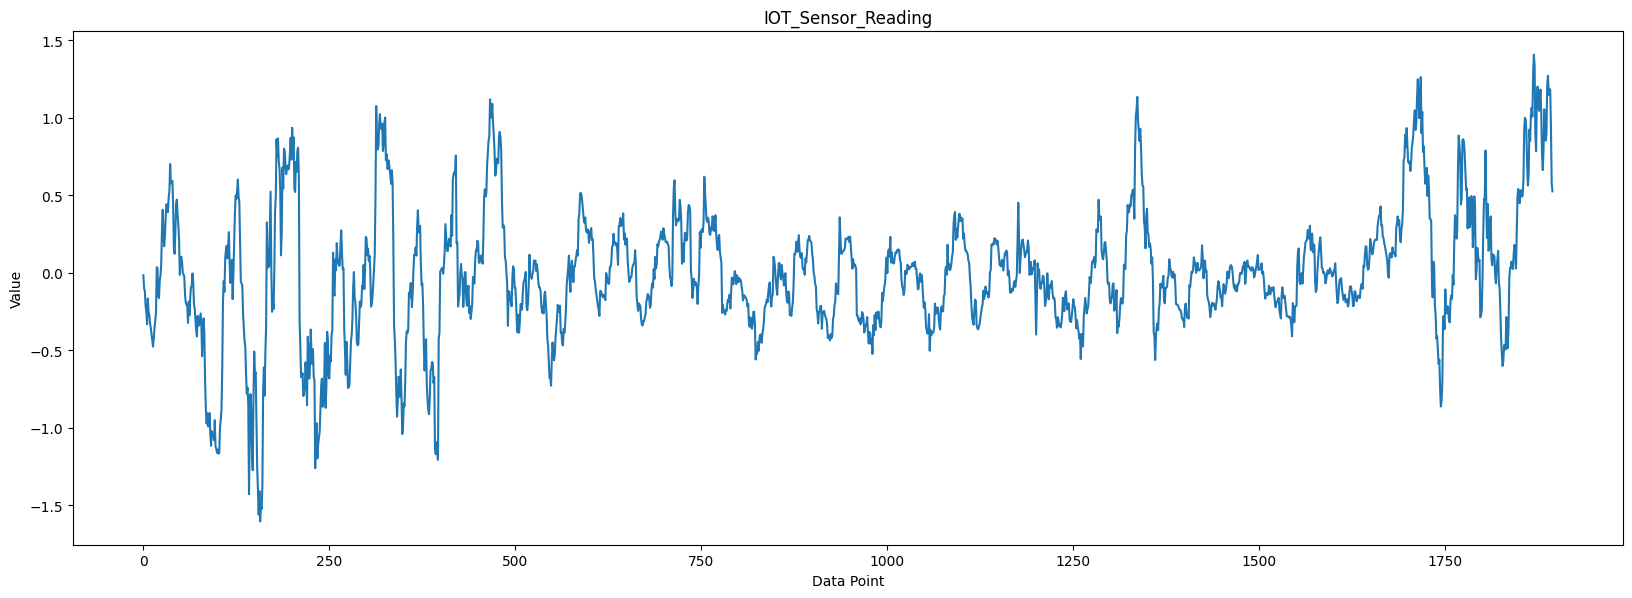

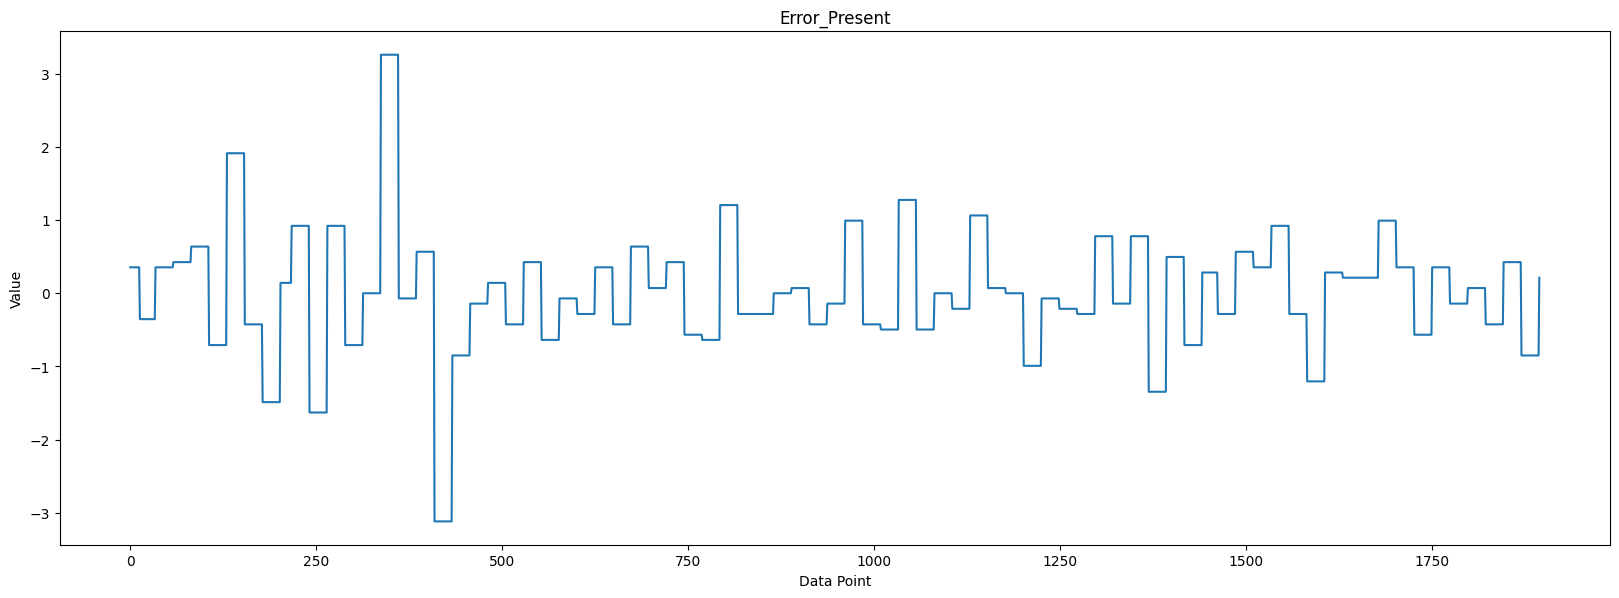

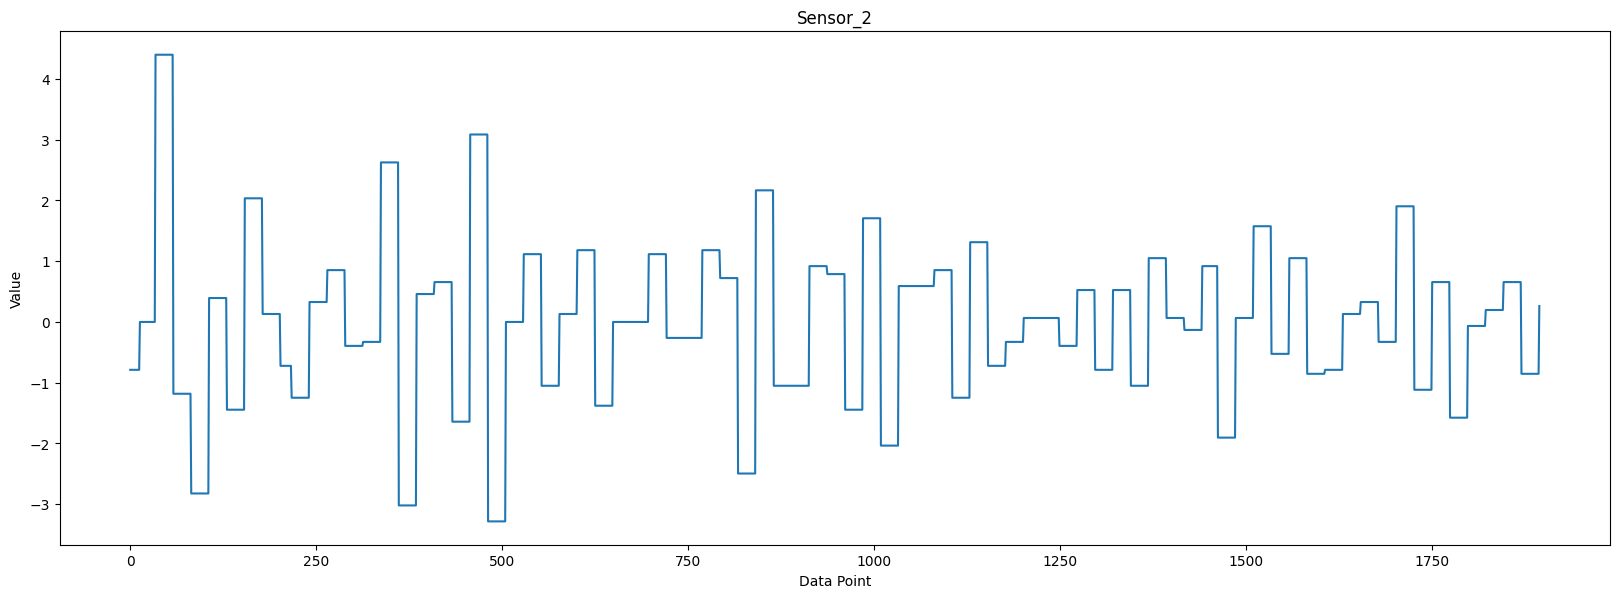

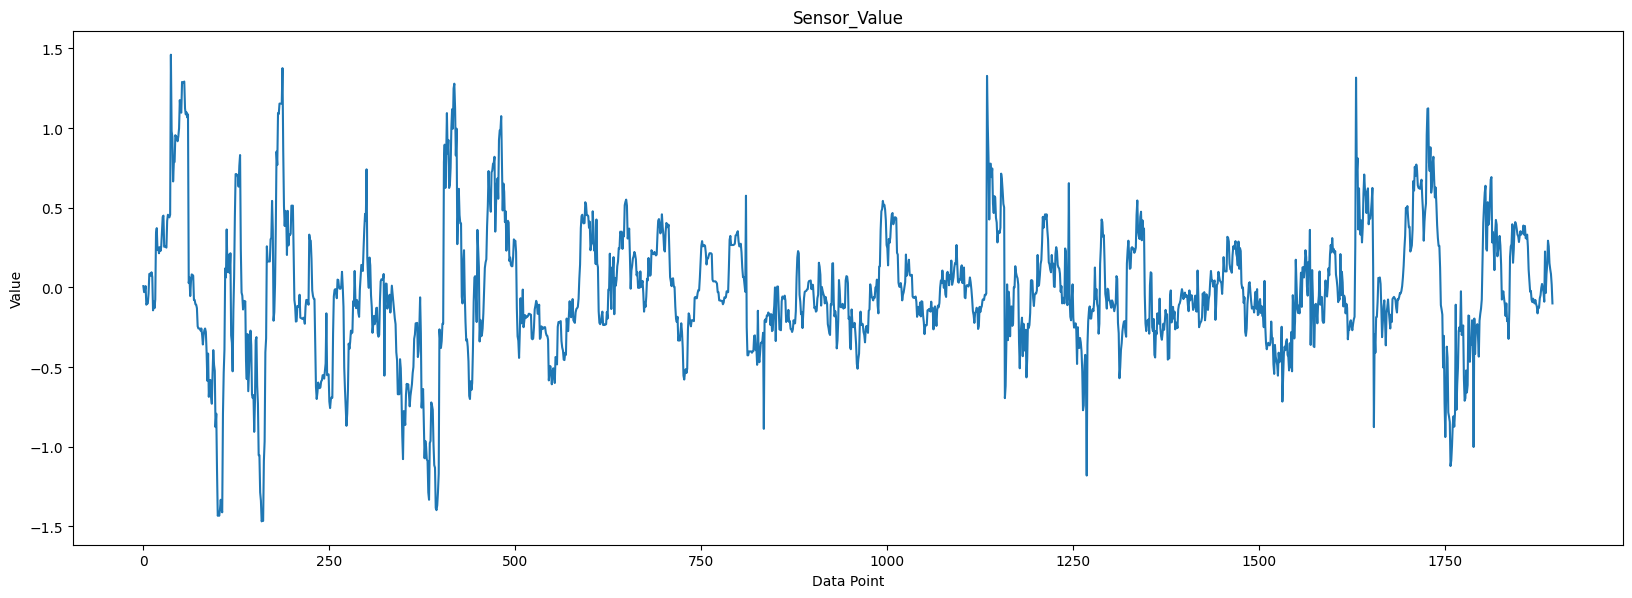

In [79]:
plot_var(df,'time')

### **Q-Q Plot**

The QQ (Quantile-Quantile) plot is a graphical tool used to assess if a given dataset follows a particular theoretical distribution. It compares the quantiles of the observed data with the quantiles of the theoretical distribution.

In the provided code snippet, the QQ plot is used to examine the distribution of the "IOT_Sensor_Reading" variable from the DataFrame "df". The scipy.stats.probplot function is used to generate the QQ plot, with the "IOT_Sensor_Reading" data passed as the first argument. The "plot=pylab" parameter ensures that the plot is displayed using the matplotlib.pyplot module.

The resulting plot displays the quantiles of the observed data on the y-axis and the quantiles of the theoretical distribution on the x-axis. If the observed data follows the theoretical distribution, the points on the plot will roughly fall along a straight line. Deviations from this straight line indicate departures from the assumed distribution.

**QQ plots are commonly used in statistics and data analysis for various purposes, including**

- Testing for normality: QQ plots can help assess whether the observed data follows a normal distribution. If the points on the QQ plot deviate significantly from the 45-degree line, it suggests non-normality.
- Comparing distributions: QQ plots can be used to compare the distributions of different data sets or to compare a data set to different theoretical distributions.
- Detecting outliers: QQ plots can reveal outliers or extreme values in the data by examining deviations from the expected pattern.

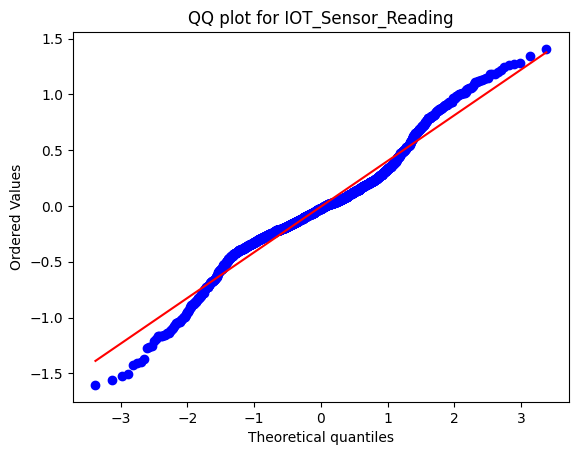

In [18]:
# The QQ plot
scipy.stats.probplot(df.IOT_Sensor_Reading, plot=pylab)
plt.title("QQ plot for IOT_Sensor_Reading")
pylab.show()

In [80]:
df['IOT_Sensor_Reading'].mean()

-0.005884926703430078

In [81]:
df['IOT_Sensor_Reading'].min()

-1.603790141

In [82]:
df['IOT_Sensor_Reading'].max()

1.406986601

In [83]:
# Extract the hour of the day from the 'datetime' column
hour = df['time'].dt.hour

# Create a new column with labels for 'morning', 'noon', and 'evening'

df['time_of_day'] = pd.cut(hour, bins=[0, 11, 16, 23], labels=['morning', 'noon', 'evening'])

df.head()

,time,IOT_Sensor_Reading,Error_Present,Sensor_2,Sensor_Value,time_of_day
0,2017-08-29 11:00:00,-0.015871,0.353986,-0.787655,0.008144,morning
1,2017-08-29 12:00:00,-0.101576,0.353986,-0.787655,-0.029860,noon
2,2017-08-29 13:00:00,-0.118241,0.353986,-0.787655,-0.021717,noon
3,2017-08-29 14:00:00,-0.214262,0.353986,-0.787655,0.008144,noon
4,2017-08-29 15:00:00,-0.249972,0.353986,-0.787655,-0.108583,noon


**Time of Day:**
- 0-11 is morning
- 11-16 is noon
- 16-23 is evening

In [84]:
max_IOT_Sensor_Reading = df.groupby('time_of_day')['IOT_Sensor_Reading'].max()
max_IOT_Sensor_Reading

time_of_day
morning    1.249068
noon       1.262558
evening    1.406987
Name: IOT_Sensor_Reading, dtype: float64

In [85]:
min_IOT_Sensor_Reading = df.groupby('time_of_day')['IOT_Sensor_Reading'].min()
min_IOT_Sensor_Reading

time_of_day
morning   -1.603790
noon      -1.428413
evening   -1.273668
Name: IOT_Sensor_Reading, dtype: float64

In [86]:
avg_IOT_Sensor_Reading = df.groupby('time_of_day')['IOT_Sensor_Reading'].mean()
avg_IOT_Sensor_Reading

time_of_day
morning   -0.009616
noon      -0.009113
evening    0.001481
Name: IOT_Sensor_Reading, dtype: float64

In [87]:
df['day_of_week'] = df['time'].dt.day_name()

In [88]:
max_IOT_Sensor_Reading = df.groupby('day_of_week')['IOT_Sensor_Reading'].max()
max_IOT_Sensor_Reading

day_of_week
Friday       0.628502
Monday       1.119717
Saturday     0.885616
Sunday       0.861809
Thursday     1.341914
Tuesday      1.134795
Wednesday    1.406987
Name: IOT_Sensor_Reading, dtype: float64

In [89]:
min_IOT_Sensor_Reading = df.groupby('day_of_week')['IOT_Sensor_Reading'].min()
min_IOT_Sensor_Reading

day_of_week
Friday      -1.260178
Monday      -1.428413
Saturday    -1.166537
Sunday      -0.743568
Thursday    -0.911803
Tuesday     -1.603790
Wednesday   -1.040361
Name: IOT_Sensor_Reading, dtype: float64

In [90]:
avg_IOT_Sensor_Reading = df.groupby('day_of_week')['IOT_Sensor_Reading'].mean()
avg_IOT_Sensor_Reading

day_of_week
Friday      -0.203002
Monday      -0.015544
Saturday    -0.075076
Sunday      -0.006987
Thursday     0.128790
Tuesday      0.024950
Wednesday    0.089639
Name: IOT_Sensor_Reading, dtype: float64

In [91]:
df.shape

(1895, 7)

In [92]:
#df.sort_values('time', inplace=True)
df.set_index('time', inplace=True)

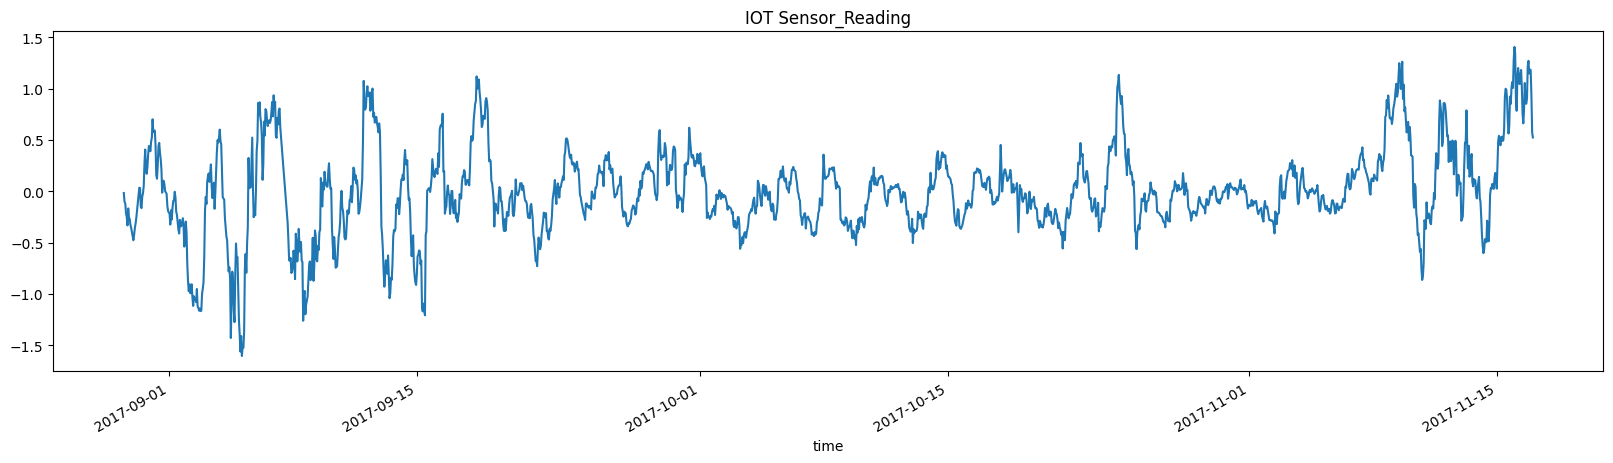

In [93]:
df.IOT_Sensor_Reading.plot(figsize=(20,5), title="IOT Sensor_Reading")
plt.show()

- The asfreq() method is typically used for resampling time series data. Resampling involves changing the frequency of the time series data, either by increasing (upsampling) or decreasing (downsampling) the frequency.
- The parameter 'H' passed to asfreq() specifies the new frequency to which the data will be converted. In this case, 'H' stands for hourly frequency, meaning that the data will be resampled to an hourly frequency.

- If the new frequency specified by 'H' is higher than the original frequency of the data, it is considered upsampling. In this case, new time points will be added to the DataFrame, and missing values will be filled in (usually using interpolation or filling with NaN values).
- If the new frequency is lower than the original frequency, it is considered downsampling. In this case, existing time points will be aggregated or reduced to match the new frequency (e.g., by taking the mean or sum of values within each new interval).

In [99]:
df.asfreq('H')  #rounding off the hourly time

,IOT_Sensor_Reading,Error_Present,Sensor_2,Sensor_Value,time_of_day,day_of_week
time,,,,,,
2017-08-29 11:00:00,-0.015871,0.353986,-0.787655,0.008144,morning,Tuesday
2017-08-29 12:00:00,-0.101576,0.353986,-0.787655,-0.029860,noon,Tuesday
2017-08-29 13:00:00,-0.118241,0.353986,-0.787655,-0.021717,noon,Tuesday
2017-08-29 14:00:00,-0.214262,0.353986,-0.787655,0.008144,noon,Tuesday
2017-08-29 15:00:00,-0.249972,0.353986,-0.787655,-0.108583,noon,Tuesday
...,...,...,...,...,...,...
2017-11-16 20:00:00,1.186376,-0.849566,-0.853293,0.152016,evening,Thursday
2017-11-16 21:00:00,1.182408,-0.849566,-0.853293,0.114012,evening,Thursday
2017-11-16 22:00:00,0.934023,-0.849566,-0.853293,0.084152,evening,Thursday


In [100]:
df = df.asfreq('H')

In [101]:
df.shape

(1910, 6)

## **Handling Missing Values in a Time Series Data**

Handling missing values in time series data is a crucial step in the data preprocessing stage. Missing values can occur due to various reasons, such as sensor failures, data transmission issues, or human errors. Dealing with missing values is essential to ensure the integrity and accuracy of the time series analysis. In this section, we will discuss different strategies for handling missing values in time series data.

* Deletion: The simplest approach to handling missing values is to delete the rows or time periods that contain missing values. However, this approach should be used with caution as it can lead to a loss of valuable information, especially if the missing values are frequent or systematic. Deletion can be appropriate when the missing values are random and do not significantly affect the overall analysis.

* Forward Fill (or Last Observation Carried Forward - LOCF): In this method, missing values are replaced with the last observed value. This approach assumes that the missing values do not change abruptly and that the previous value can reasonably represent the missing value. Forward fill is suitable when there is a gradual change in the time series data, such as slowly varying trends or seasonality.

* Backward Fill (or Next Observation Carried Backward - NOCB): In this method, missing values are replaced with the next observed value. Similar to forward fill, backward fill assumes a gradual change in the time series and uses the following value to fill in the missing values. Backward fill is appropriate when there is a delay or lag in the time series, such as in financial or economic data.

* Interpolation: Interpolation methods estimate missing values based on the values of neighboring data points. Common interpolation techniques include linear interpolation, cubic spline interpolation, and polynomial interpolation. These methods provide a smoother estimation of the missing values by considering the trend and patterns in the data. However, it is important to note that interpolation assumes a continuous and smooth progression in the time series data.

* Mean or Median Imputation: In this method, missing values are replaced with the mean or median of the available data. Mean imputation replaces missing values with the average value of the time series, while median imputation uses the middle value. This approach is simple and easy to implement, but it may not accurately capture the dynamics or variability of the data. Mean or median imputation should be used with caution, as it can distort the statistical properties of the time series.

* Model-based Imputation: Model-based imputation involves building a model based on the available data and using it to predict the missing values. This approach can be more sophisticated and accurate compared to simple imputation methods. Techniques such as regression models, ARIMA models, or machine learning algorithms can be used to estimate the missing values based on the relationship with other variables or past observations. Model-based imputation requires careful consideration of the underlying assumptions and the choice of an appropriate model.

In [102]:
df.IOT_Sensor_Reading = df.IOT_Sensor_Reading.fillna(method="ffill")

df.Error_Present = df.Error_Present.fillna(method="bfill")

df.Sensor_2 = df.Sensor_2.fillna(method="bfill")

df.Sensor_Value = df.Sensor_Value.fillna(value=df.Sensor_Value.mean())

## **Components of Timeseries Trend, Seasonality, Cyclicity and Noise**

Time series data often exhibits various components that contribute to its overall pattern and behavior. Understanding these components is crucial for accurate analysis and forecasting. In this section, we will discuss the four main components of time series: trend, seasonality, cyclicity, and noise.

* Trend: The trend component represents the long-term, systematic, and persistent pattern in the time series. It captures the overall direction in which the data is moving over an extended period of time. Trends can be either upward (increasing), downward (decreasing), or horizontal (constant). Trends can occur due to various factors such as economic factors, population growth, technological advancements, or other underlying drivers. Identifying and analyzing trends in a time series can provide valuable insights into the underlying processes and help in making informed predictions.

* Seasonality: Seasonality refers to a regular and predictable pattern that repeats itself within a fixed time period. It is often associated with calendar-related or seasonal effects, such as daily, weekly, monthly, or yearly patterns. Seasonality can be observed in various domains, including sales data (higher sales during holidays), weather data (temperature variations throughout the year), or stock market data (periodic fluctuations). Seasonal patterns can be additive, where the magnitude of the pattern remains consistent over time, or multiplicative, where the pattern's magnitude changes with the level of the time series. Understanding and accounting for seasonality is crucial for accurate forecasting and identifying abnormal patterns or anomalies.

* Cyclicity: Cyclicity refers to patterns in the time series that occur at irregular intervals and are typically longer-term than seasonality. These patterns do not have fixed and predictable lengths like seasonality but exhibit repetitive fluctuations. Cyclical patterns can be driven by economic cycles, business cycles, or other external factors that influence the time series. Unlike seasonality, the duration and amplitude of cyclical patterns can vary across different cycles. Identifying and analyzing cyclical patterns can provide insights into the long-term dynamics of the time series and help in understanding broader trends and fluctuations.

* Noise (Irregularity or Residual): Noise refers to the random and unpredictable fluctuations or irregularities in the time series that cannot be attributed to the trend, seasonality, or cyclicity. It represents the unexplained or residual variation in the data that is not accounted for by the other components. Noise can arise due to measurement errors, random shocks, or other unpredictable factors. Noise is typically characterized by its statistical properties, such as mean, variance, and autocorrelation. Although noise is unavoidable in most time series data, it is important to analyze and understand its characteristics to differentiate it from meaningful patterns and make reliable forecasts.

It is important to note that the presence and characteristics of these components may vary across different time series data. Some time series may exhibit all four components (trend, seasonality, cyclicity, and noise), while others may only have one or a combination of a few components. Additionally, these components can interact with each other, making the analysis and modeling more complex. Effective time series analysis involves identifying and modeling these components appropriately to capture the underlying patterns and dynamics accurately.

By decomposing a time series into its individual components, analysts can gain insights into the various factors driving the data, identify patterns, and make more accurate predictions. 

**we use the seasonal_decompose() function to decompose the time series into trend, seasonal, and residual components.
The model parameter is set to 'additive', assuming that the components add up to form the observed time series. If your data exhibits multiplicative seasonality, you can change the model parameter to 'multiplicative'.**

After decomposing the time series, we extract the trend, seasonal, and residual components using the respective attributes of the decomposition object.
Finally, we plot the original time series and the extracted components using matplotlib. The resulting plot will show the trend, seasonality, and residuals separately.

In [103]:
# Decompose the time series into trend, seasonal, cyclical, and irregular components
decomp = seasonal_decompose(df['IOT_Sensor_Reading'], model='additive', period=365)
# Extract the components
trend = decomp.trend
seasonal = decomp.seasonal
irregular = decomp.resid

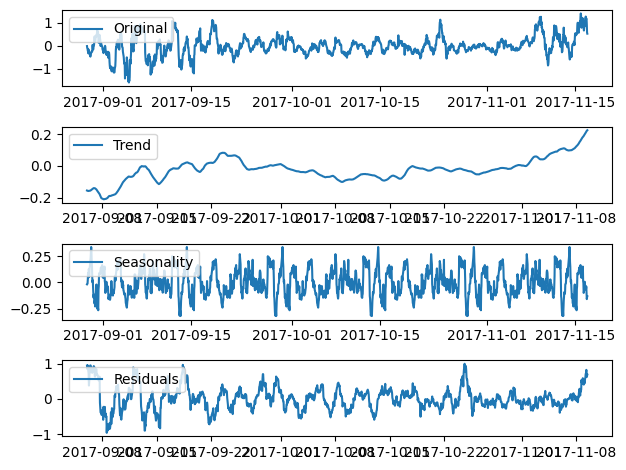

In [110]:
# Plot the components
plt.subplot(411)
plt.plot(df['IOT_Sensor_Reading'], label='Original')
plt.legend(loc='upper left')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='upper left')
plt.subplot(413)
plt.plot(seasonal, label='Seasonality')
plt.legend(loc='upper left')
plt.subplot(414)
plt.plot(irregular, label='Residuals')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()


#In the plt.subplot() function, the numbers 411, 412, and 413 are used to specify 
#the position of each subplot in a 4x1 grid of subplots.
#Here's how the numbering works:
#The first digit represents the number of rows in the grid.
#The second digit represents the number of columns in the grid.
#The third digit represents the position of the subplot within the grid]

<Axes: xlabel='time'>

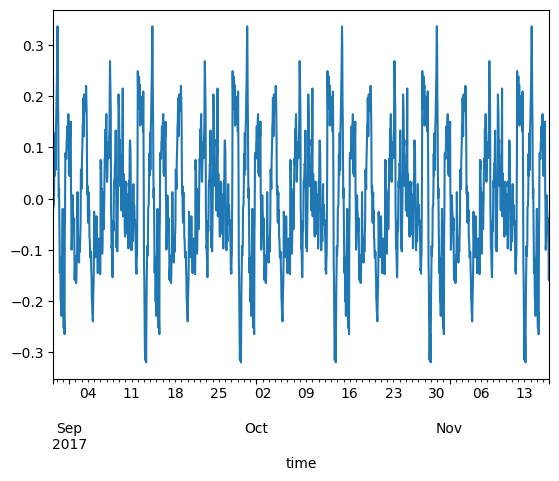

In [111]:
seasonal.plot()

<Axes: xlabel='time'>

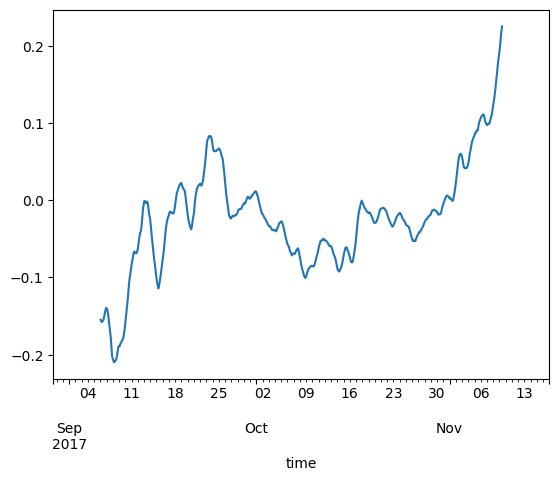

In [112]:
trend.plot()

<Axes: xlabel='time'>

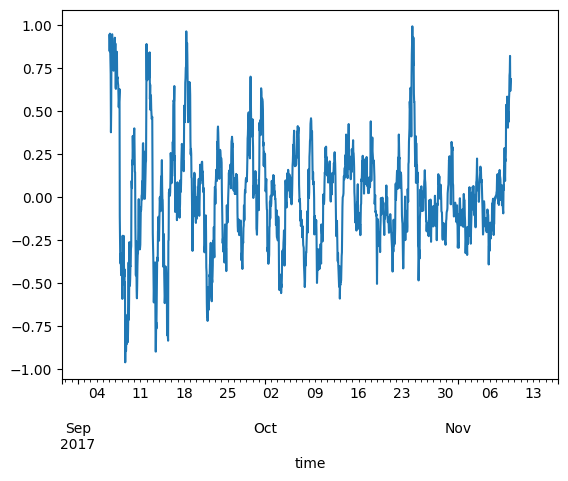

In [113]:
irregular.plot()

In [114]:
df = df[['IOT_Sensor_Reading']]
df.head()

,IOT_Sensor_Reading
time,
2017-08-29 11:00:00,-0.015871
2017-08-29 12:00:00,-0.101576
2017-08-29 13:00:00,-0.118241
2017-08-29 14:00:00,-0.214262
2017-08-29 15:00:00,-0.249972


## **Stationarity and Its Importance for Forecasting**

In time series analysis, stationarity is a crucial concept that plays a fundamental role in understanding and forecasting data. A stationary time series is one whose statistical properties, such as mean, variance, and autocorrelation, remain constant over time. Conversely, a non-stationary time series exhibits varying statistical properties, making it challenging to model and predict accurately.

Importance of Stationarity for Forecasting:

* Consistency of Statistical Properties: Stationary time series exhibit consistent statistical properties over time, such as a constant mean and variance. This property allows us to make reliable assumptions about the behavior of the data and build models that remain valid over the entire time frame. In contrast, non-stationary time series often have changing statistical properties, which can lead to misleading conclusions and unreliable forecasts.

* Simplifies Modeling: Stationarity simplifies the modeling process by reducing the complexity and uncertainty associated with non-stationary data. In a stationary time series, the relationship between past and future observations remains relatively stable, allowing us to apply traditional statistical and mathematical techniques for forecasting. Modeling non-stationary data requires additional steps, such as differencing or transformation, to make the series stationary before applying forecasting methods.

* Assumptions of Forecasting Models: Many forecasting models, such as autoregressive integrated moving average (ARIMA), assume stationarity. These models are built upon the idea that the future behavior of a time series can be predicted based on its past behavior. Stationarity ensures that the underlying patterns and dynamics captured by these models remain stable over time, making the forecasts more reliable.

* Accurate Parameter Estimation: Stationarity enables accurate estimation of model parameters. In a stationary series, the statistical properties are time-invariant, allowing us to estimate model parameters based on the entire data without the risk of biased or inconsistent estimates. Non-stationary series, on the other hand, often require estimation techniques that consider the changing nature of the data, such as time-varying models or structural break analysis.

* Better Forecasting Performance: Forecasting models built on stationary time series tend to have better performance compared to those built on non-stationary data. Stationarity provides a stable foundation for modeling and capturing the underlying patterns, trends, and relationships within the data. This stability enhances the accuracy and reliability of forecasts, leading to better decision-making and planning.

Testing for Stationarity:

To assess stationarity, statistical tests like the Augmented Dickey-Fuller (ADF) test or the Kwiatkowski-Phillips-Schmidt-Shin (KPSS) test can be performed. These tests examine the presence of unit roots or trends in the data and provide insights into the stationarity of the series. A stationary series will have a p-value below a certain threshold in these tests, indicating the rejection of the null hypothesis of non-stationarity.

If a time series is found to be non-stationary, it can be made stationary through techniques like differencing, logarithmic transformation, or seasonal adjustment. These transformations aim to eliminate the trend, seasonality, or other non-stationary components, making the series suitable for forecasting using stationary models.

## **Augmented Dickey Fuller Test**

The Augmented Dickey-Fuller (ADF) test is a statistical test used to determine if a time series is stationary or not. It is an extension of the Dickey-Fuller test and is widely used in time series analysis and forecasting.

The ADF test is based on the concept of unit roots, which indicate non-stationarity in a time series. Non-stationarity refers to the situation where the statistical properties of a time series, such as the mean and variance, are not constant over time. This makes it difficult to analyze and model the data accurately.

n time series analysis, a unit root is a characteristic of a time series that makes it non-stationary. A unit root implies that the time series has a root at exactly 1. Technically, a unit root exists in a time series when the coefficient of the lagged dependent variable is equal to 1 in the following equation:

Y(t) = α * Y(t-1) + Xe

In this equation, Y(t) represents the value of the time series at time 't', Y(t-1) represents the lagged value of the time series at time 't-1', α represents the coefficient of the lagged variable, and Xe represents an exogenous variable (a separate explanatory variable that is also a time series).

The presence of a unit root indicates non-stationarity in the time series. Non-stationarity means that the statistical properties of the time series, such as the mean and variance, are not constant over time. Instead, they exhibit trends or other patterns that make it difficult to analyze and model the data accurately.

When a time series has a unit root, it implies that the series has not reached a stable, equilibrium state and may exhibit persistent patterns or trends. As a result, the series may display random walks or exhibit behavior that is difficult to predict or forecast accurately.

The presence of unit roots in a time series affects the interpretation and modeling of the data. In order to apply many statistical techniques, including autoregressive integrated moving average (ARIMA) models, it is essential to transform the non-stationary series into a stationary one. This transformation often involves differencing the series to eliminate the unit root and make the series stationary.

Differencing is a common technique used to remove unit roots and make a time series stationary. By differencing, we compute the differences between consecutive observations in the series, effectively eliminating the trends and non-stationarity caused by the unit root. The differenced series can then be analyzed and modeled using various time series techniques.

The null hypothesis of the ADF test is that the time series has a unit root, which implies non-stationarity. The alternate hypothesis is that the time series is stationary. The test statistic is computed, and based on its value and the associated p-value, a decision is made whether to reject the null hypothesis or not.

The ADF test involves estimating the following regression equation:

ΔY(t) = α + βt + γY(t-1) + δ₁ΔY(t-1) + δ₂ΔY(t-2) + ... + δₙΔY(t-n) + ε(t)

In this equation, ΔY(t) represents the differenced series at time 't', Y(t-1) represents the lagged value of the series, α represents the intercept term, β represents the coefficient of time trend, γ represents the coefficient of the lagged variable, δ₁, δ₂, ..., δₙ represent the coefficients of the differenced series, and ε(t) represents the error term.

Since the null hypothesis assumes the presence of unit root, that is α=1, the p-value obtained should be less than the significance level (say 0.05) in order to reject the null hypothesis. Thereby, inferring that the series is stationary.

## **Kwiatkowski-Phillips-Schmidt-Shin (KPSS) Test**

The Kwiatkowski-Phillips-Schmidt-Shin (KPSS) test is a statistical test used to determine the stationarity of a time series. Unlike the Augmented Dickey-Fuller (ADF) test, which tests for the presence of unit roots, the KPSS test examines the null hypothesis that the time series is stationary against the alternative hypothesis of a unit root or non-stationarity.

The KPSS test is based on the following regression equation:

Y(t) = μ + ε(t) + Σₖ(γₖ * tₖ) + Σₘ(δₘ * Zₘ) + ν(t)

In this equation, Y(t) represents the observed time series at time 't', μ represents the intercept term, ε(t) represents the error term, tₖ represents the time trend, γₖ represents the coefficient of the time trend, Zₘ represents the exogenous variables, δₘ represents the coefficient of the exogenous variables, and ν(t) represents the stochastic component of the model.

The KPSS test involves estimating the above regression equation and computing the test statistic, which is based on the sum of squared residuals from the regression. The test statistic is compared to critical values to determine whether to reject the null hypothesis of stationarity or not.

The null hypothesis of the KPSS test is that the time series is stationary, while the alternative hypothesis is that the time series has a unit root or is non-stationary. The test statistic follows a specific distribution, and its critical values are used to determine the rejection region.

In order to reject the null hypothesis, the test statistic should be greater than the provided critical values. If it is in fact higher than the target critical value, then that should automatically reflect in a low p-value.

That is, if the p-value is less than 0.05, the kpss statistic will be greater than the 5% critical value.

Finally, the number of lags reported is the number of lags of the series that was actually used by the model equation of the kpss test.

The major difference between the Kwiatkowski-Phillips-Schmidt-Shin (KPSS) test and the Augmented Dickey-Fuller (ADF) test lies in their respective capabilities to assess stationarity in the presence of a deterministic trend.

The ADF test is primarily designed to detect the presence of a unit root in a time series, which indicates non-stationarity. It assumes that the underlying data generating process includes a stochastic trend component. In other words, the ADF test is effective in identifying non-stationarity caused by a random walk or a trend that follows a linear or polynomial pattern.

On the other hand, the KPSS test is specifically designed to examine the stationarity of a time series in the presence of a deterministic trend. The word ‘deterministic’ implies the slope of the trend in the series does not change permanently. That is, even if the series goes through a shock, it tends to regain its original path.

The KPSS test extends the analysis beyond the presence of a unit root and allows for the examination of stationarity when a deterministic trend is present. It tests the null hypothesis that the time series is stationary against the alternative hypothesis of a unit root or non-stationarity with a deterministic trend.

By considering the presence of a deterministic trend, the KPSS test provides a more comprehensive assessment of the stationarity of a time series.

## **Stationary check using ADF and KPSS**

we plot the original time series using plt.plot(). This allows us to visually inspect the data to see if it appears to be stationary or non-stationary.

To test for stationarity, we use the adfuller() function from the statsmodels library. We pass in the value column of the DataFrame and the function returns an Augmented Dickey-Fuller test result which includes an ADF statistic, a p-value, and critical values for different levels of significance.

Based on the p-value, we can determine if the original time series is stationary or non-stationary. If the p-value is less than the significance level (e.g. 0.05), we reject the null hypothesis and conclude that the time series is stationary. If the p-value is greater than the significance level, we fail to reject the null hypothesis and conclude that the time series is non-stationary.

If the original time series is non-stationary, we can difference the data using the diff() function and then test for stationarity of the differenced time series using adfuller() again. If the differenced time series is stationary, we can use it for further analysis.

Finally, we plot the differenced time series using plt.plot() to visualize the difference.

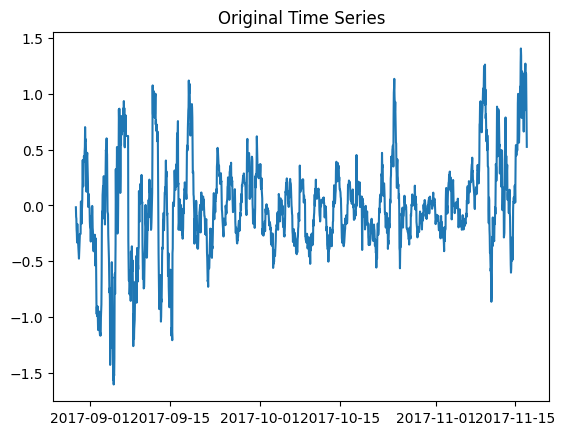

ADF Statistic:  -6.110712566123994
p-value:  9.347651207123362e-08
Critical Values: 
1% :  -3.433825707083533
5% :  -2.8630753283581076
10% :  -2.567587351898432


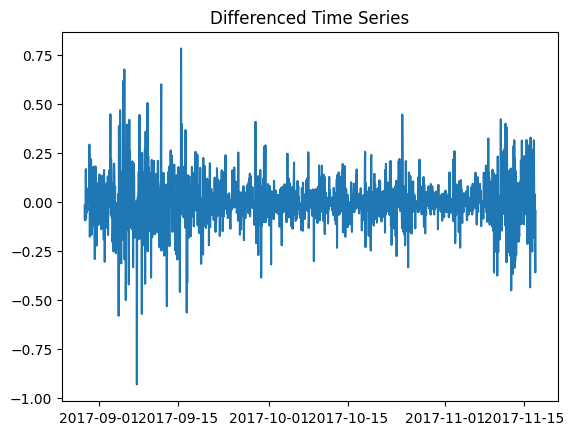

ADF Statistic:  -13.95177317162291
p-value:  4.687970518890155e-26
Critical Values: 
1% :  -3.4338238606869878
5% :  -2.863074513221476
10% :  -2.5675869178703854


In [43]:
#using ADF
# Plot the time series
plt.plot(df['IOT_Sensor_Reading'])
plt.title('Original Time Series')
plt.show()
checkpoint('c2bf09')

# Test for stationarity
result = adfuller(df['IOT_Sensor_Reading'])
print('ADF Statistic: ', result[0])
print('p-value: ', result[1])
print('Critical Values: ')
for key, value in result[4].items():
    print(key, ": ", value)

# Difference the time series and plot
diff_data = df.diff().dropna()
plt.plot(diff_data)
plt.title('Differenced Time Series')
plt.show()

# Test for stationarity of differenced time series
result = adfuller(diff_data['IOT_Sensor_Reading'])
print('ADF Statistic: ', result[0])
print('p-value: ', result[1])
print('Critical Values: ')
for key, value in result[4].items():
    print(key, ": ", value)


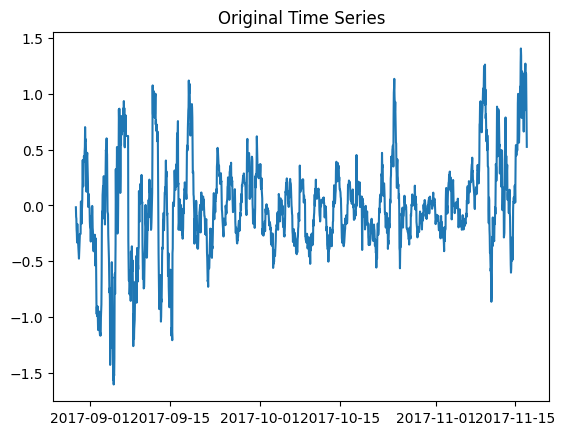

KPSS Statistic: 0.7047053229482739
p-value: 0.013117697913793278
Critical Values:
10%: 0.347
5%: 0.463
2.5%: 0.574
1%: 0.739


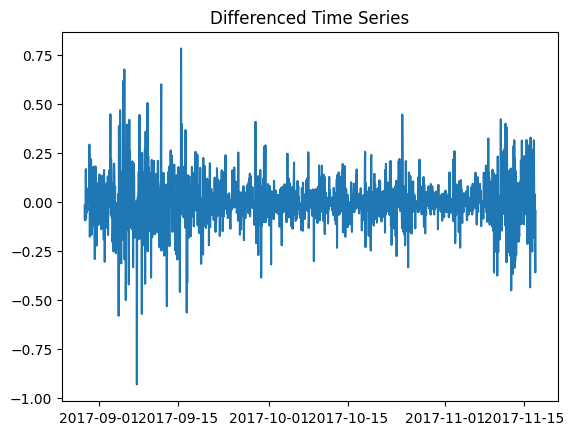

KPSS Statistic: 0.7047053229482739
p-value: 0.013117697913793278
Critical Values:
10%: 0.347
5%: 0.463
2.5%: 0.574
1%: 0.739


In [44]:
#Using KPSS

# Plot the time series
plt.plot(df['IOT_Sensor_Reading'])
plt.title('Original Time Series')
plt.show()

# Perform KPSS test
result = kpss(df['IOT_Sensor_Reading'])

# Extract and print results
kpss_statistic = result[0]
p_value = result[1]
critical_values = result[3]

print('KPSS Statistic:', kpss_statistic)
print('p-value:', p_value)
print('Critical Values:')
for key, value in critical_values.items():
    print(f'{key}: {value}')

# Difference the time series and plot
diff_data = df.diff().dropna()
plt.plot(diff_data)
plt.title('Differenced Time Series')
plt.show()

# Test for stationarity of differenced time series
# Perform KPSS test
result = kpss(df['IOT_Sensor_Reading'])

# Extract and print results
kpss_statistic = result[0]
p_value = result[1]
critical_values = result[3]

print('KPSS Statistic:', kpss_statistic)
print('p-value:', p_value)
print('Critical Values:')
for key, value in critical_values.items():
    print(f'{key}: {value}')

##  **ACF and PACF plots**

ACF (Autocorrelation Function) and PACF (Partial Autocorrelation Function) plots are graphical tools used in time series analysis to understand the correlation and relationship between observations in a time series.

#### **Autocorrelation Function (ACF) Plot:**
The ACF plot measures the correlation between an observation in a time series and its lagged values. It provides information about the linear relationship between the current observation and its past observations at different lags. The ACF plot shows the correlation coefficients on the y-axis and the lags on the x-axis.
Interpreting the ACF plot:

If the ACF plot shows a significant positive correlation at lag 1 (the first lag), it suggests that the current observation is positively correlated with its immediate past observation.
If the ACF plot shows a significant negative correlation at lag 1, it indicates a negative correlation between the current observation and its immediate past observation.
If the ACF plot shows significant correlations at multiple lags, it suggests a repeating pattern or a trend in the time series.


#### **Partial Autocorrelation Function (PACF) Plot:**
The PACF plot measures the correlation between an observation in a time series and its lagged values while removing the influence of intervening observations. It provides insights into the direct relationship between the current observation and its past observations, excluding the influence of other lags.
Interpreting the PACF plot:

The PACF plot helps identify the order of an autoregressive (AR) model. An AR model uses past observations as predictors for the current observation.
If the PACF plot shows a significant spike at lag 1 and no significant spikes at other lags, it suggests an AR(1) model, where the current observation depends only on the immediate past observation.
If the PACF plot shows significant spikes at multiple lags, it suggests an AR model with multiple lags.
Both the ACF and PACF plots help in determining the order of autoregressive and moving average components in an ARIMA model. By analyzing the decay of the correlation coefficients in the plots, one can identify potential values for the order of AR and MA terms, which are crucial for model selection and forecasting in time series analysis.

To plot the ACF, we use the plot_acf() function from statsmodels.graphics.tsaplots module. We pass in the value column of the DataFrame and specify the number of lags to consider using the lags parameter. The ACF plot helps us understand the correlation between the time series and its lagged values.

Similarly, to plot the PACF, we use the plot_pacf() function from the same module. Again, we pass in the value column of the DataFrame and specify the number of lags to consider using the lags parameter. The PACF plot helps us identify the direct relationship between the time series and its lagged values, after accounting for the intermediate lags.

Both plots will provide visual insights into the autocorrelation and partial autocorrelation structures in the data, which can be useful for identifying potential patterns and selecting appropriate models for time series analysis.

<Figure size 1200x400 with 0 Axes>

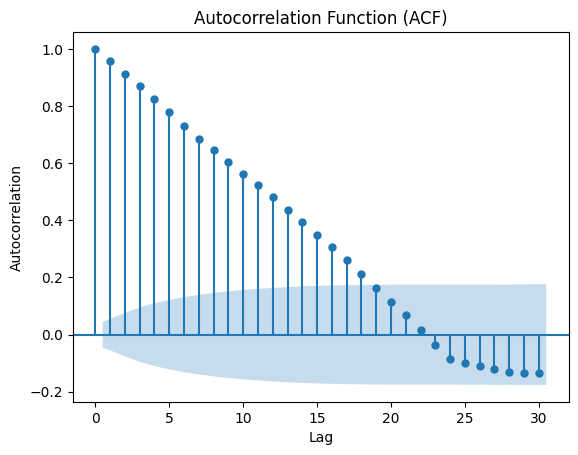

<Figure size 1200x400 with 0 Axes>

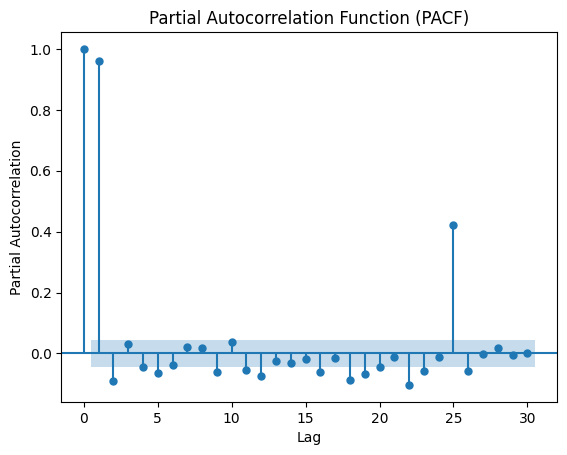

In [45]:
# Plot ACF
plt.figure(figsize=(12, 4))
plot_acf(df['IOT_Sensor_Reading'], lags=30)
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
plt.title('Autocorrelation Function (ACF)')
plt.show()

# Plot PACF
plt.figure(figsize=(12, 4))
plot_pacf(df['IOT_Sensor_Reading'], lags=30)
plt.xlabel('Lag')
plt.ylabel('Partial Autocorrelation')
plt.title('Partial Autocorrelation Function (PACF)')
plt.show()

# Autocovariance Matrix

In [46]:
df

,IOT_Sensor_Reading
time,
2017-08-29 11:00:00,-0.015871
2017-08-29 12:00:00,-0.101576
2017-08-29 13:00:00,-0.118241
2017-08-29 14:00:00,-0.214262
2017-08-29 15:00:00,-0.249972
...,...
2017-11-16 20:00:00,1.186376
2017-11-16 21:00:00,1.182408
2017-11-16 22:00:00,0.934023


In [47]:
# Calculate the autocovariance matrix
autocov_matrix = np.cov(df, rowvar=False)

print("Autocovariance Matrix:")
print(autocov_matrix)

Autocovariance Matrix:
0.1732515263424908


## **White Noise**


White noise refers to a random sequence of uncorrelated and independent variables with constant mean and variance. In the context of time series analysis, white noise is a fundamental concept that serves as a building block for more complex models.

Characteristics of white noise:

Constant Mean: The mean of white noise remains constant over time. It is usually assumed to be zero for simplicity, but it can have any other fixed value.

Constant Variance: The variance of white noise is constant across all time points. It implies that the variability or dispersion of the random variables does not change over time.

No Autocorrelation: In white noise, there is no systematic relationship or correlation between the current observation and any of its past or future observations. Each observation is independent and unrelated to the others.

Normally Distributed: White noise is often assumed to follow a normal distribution, although this is not a strict requirement. The key characteristic is that the random variables are uncorrelated and have a constant mean and variance.

Importance of white noise:

White noise serves as a reference or benchmark against which other time series patterns and structures can be compared. It is used in various ways in time series analysis, including:

Model Diagnostics: White noise is often used as a null model to test the validity of more complex time series models. By comparing the residuals of a model to white noise, we can assess the adequacy of the model and check if it captures all the important patterns in the data.

Simulating Data: White noise can be used as a basis for generating simulated data that mimics certain characteristics of the original time series. By adding appropriate patterns or structures to white noise, we can create more realistic and complex time series simulations.

Estimating Parameters: White noise assumptions are often made in the estimation of parameters in time series models. For example, in the estimation of autoregressive (AR) or moving average (MA) coefficients, white noise assumptions allow for efficient estimation techniques such as the method of least squares or maximum likelihood estimation.

We use np.random.normal() to generate white noise. The loc parameter specifies the mean of the distribution (0 in this case), the scale parameter specifies the standard deviation (1 in this case), and the size parameter specifies the number of samples to generate (num_samples in this case).

By default, np.random.normal() generates samples from a standard normal distribution (mean=0, standard deviation=1), which represents white noise. If you want to change the mean or standard deviation, you can adjust the loc and scale parameters accordingly.

The resulting white_noise array contains the generated white noise samples.

Finally, we plot the white noise using plt.plot() to visualize the amplitude of the noise over time. The resulting plot shows random fluctuations with no apparent pattern, characteristic of white noise.


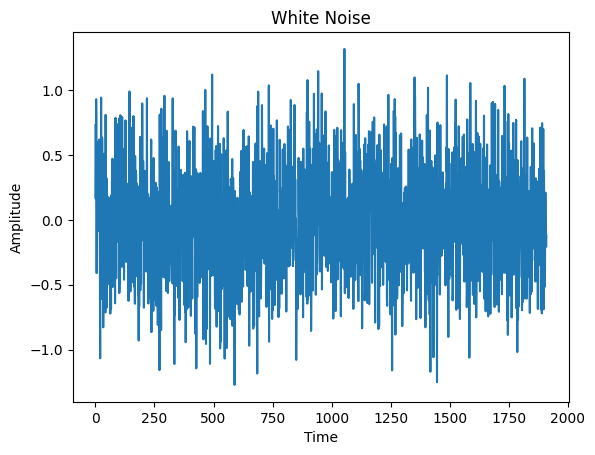

In [48]:
# Set random seed for reproducibility
np.random.seed(0)

# Generate white noise
num_samples = 1000
white_noise = np.random.normal(loc=df.IOT_Sensor_Reading.mean(), scale=df.IOT_Sensor_Reading.std(), size=len(df))
df["white_noise"] = white_noise
df.describe()
checkpoint('c2bf09')


# Plot the white noise
plt.plot(white_noise)
plt.title('White Noise')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.show()

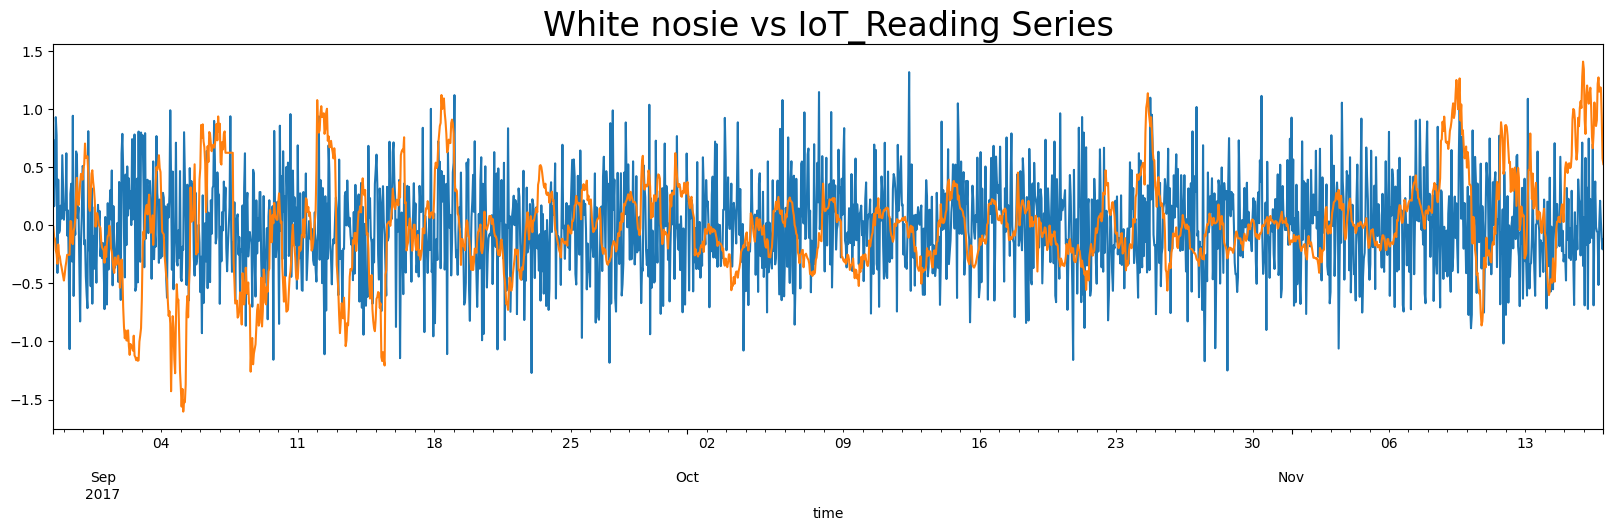

In [49]:
df.white_noise.plot(figsize=(20,5))
df.IOT_Sensor_Reading.plot(figsize=(20,5))
plt.title("White nosie vs IoT_Reading Series", size=24)
plt.show()

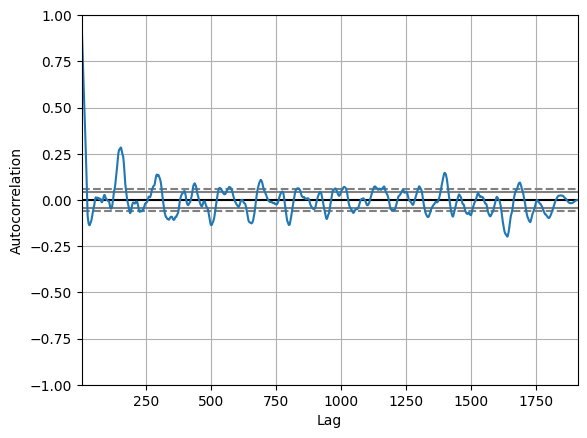

In [50]:
autocorrelation_plot(df.IOT_Sensor_Reading)
plt.show()

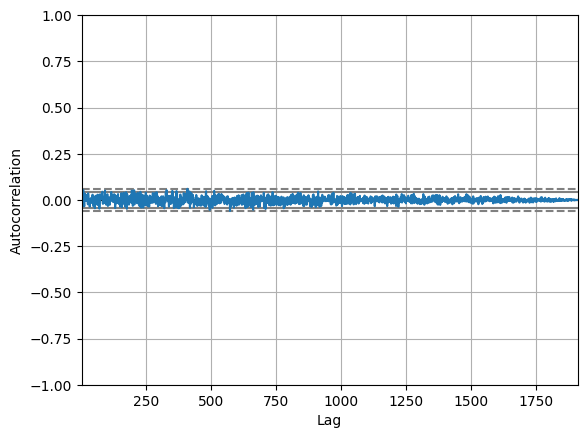

In [51]:
autocorrelation_plot(df.white_noise)
plt.show()

In [52]:
del df['white_noise']

## **Random Walk**

A random walk is a mathematical model that describes a path or trajectory of a variable where each step or movement is determined randomly. It is a time series model that has important applications in various fields, including finance, economics, and physics. Understanding random walks is essential for analyzing and forecasting time series data.

Characteristics of a random walk:

Random Steps: In a random walk, each step or movement is determined randomly. At each time period, the variable can move up or down with equal probability. The direction and magnitude of the movement are typically based on a random process, such as a coin toss or a random number generator.

Cumulative Sum: The value of the variable at any given time is the cumulative sum of all the previous random steps. It means that the current value depends on the previous values and the sequence of random steps taken.

Drift: A random walk can have a drift component, which represents a systematic trend or bias in the movement of the variable. If there is a drift, the average movement of the variable over time will be non-zero. Without a drift, the average movement will be zero.

Properties of a random walk:

Trendless: A random walk without a drift is trendless. It means that the variable moves randomly around a fixed mean without any systematic upward or downward trend. The absence of a drift implies that the expected value of the variable remains constant over time.

Non-stationary: A random walk is generally non-stationary. Stationarity refers to a property of time series where the statistical properties, such as mean and variance, do not change over time. In a random walk, the mean and variance of the variable increase as the number of steps or time periods increases. Therefore, the statistical properties change over time, indicating non-stationarity.

Applications of random walks:

Financial Markets: Random walks are widely used to model stock prices and other financial variables. The efficient market hypothesis suggests that stock prices follow a random walk with a drift component, implying that it is impossible to consistently outperform the market based on historical price patterns.

Econometrics: Random walks serve as a benchmark model in econometric analysis. They are used to test for the presence of unit roots, which indicate non-stationarity, and to analyze the long-term relationships between variables.

Monte Carlo Simulations: Random walks are employed in Monte Carlo simulations to generate random sequences of variables with specific statistical properties. These simulations are used to model and analyze complex systems in various fields.

we first set the random seed using np.random.seed() to ensure reproducibility of the results.

Next, we define the parameters for the random walk. num_steps specifies the number of steps to take, and initial_value represents the starting point of the random walk.

We generate random steps using np.random.choice() by choosing -1 or 1 with equal probability (size=num_steps). These steps represent the random increments or decrements taken at each step of the walk.

To simulate the random walk, we accumulate the steps using np.cumsum() to calculate the cumulative sum of the steps and add the initial value.

Finally, we plot the random walk using plt.plot() to visualize the value of the random walk over time. The resulting plot shows the random fluctuations as the random walk moves up or down.


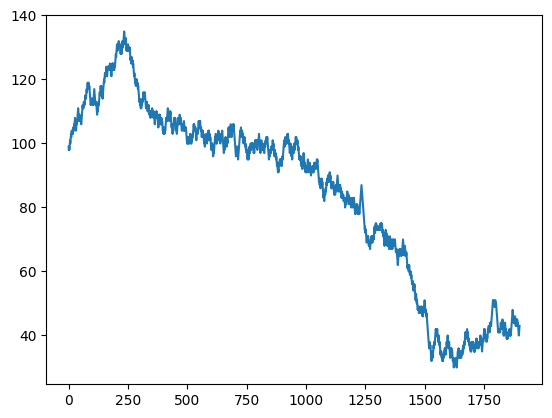

In [53]:
# Set random seed for reproducibility

walk = [99]

for i in range(1900):
    # Create random noise
    noise = -1 if np.random.random() < 0.5 else 1
    walk.append(walk[-1] + noise)
    
plt.plot(walk)

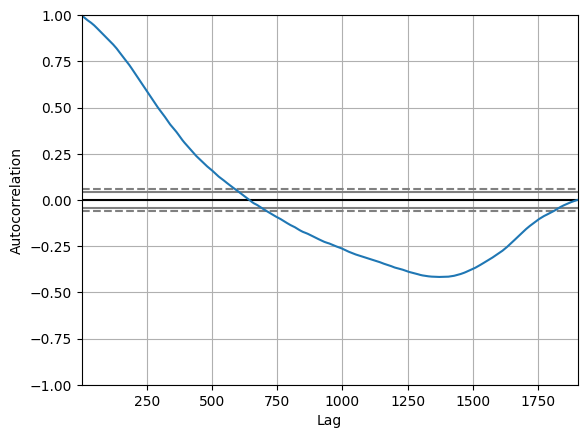

In [54]:
autocorrelation_plot(walk)
plt.show()

## **Moving Average Model**

The moving average (MA) model is a time series model that is widely used for forecasting and analyzing time-dependent data. It is a part of the broader class of autoregressive moving average (ARMA) models. The MA model describes the relationship between the observed values of a time series and the previous forecast errors.

Mathematically, an MA(q) model of order q is defined as:

X(t) = μ + ε(t) + θ₁ε(t-1) + θ₂ε(t-2) + ... + θqε(t-q)

where:

X(t) represents the value of the time series at time t.
μ is the mean of the time series.
ε(t) is the white noise error term at time t.
θ₁, θ₂, ..., θq are the parameters of the MA model that measure the influence of the previous forecast errors.
q is the order of the MA model, representing the number of lagged forecast errors considered.
Key points about the MA model:

Mean: The mean of the MA model is denoted by μ. It represents the long-term average of the time series.

Error Terms: The ε(t), ε(t-1), ..., ε(t-q) are the white noise error terms at different lags. These error terms are assumed to be independent and identically distributed with a mean of zero and constant variance.

Parameters: The θ₁, θ₂, ..., θq are the parameters of the MA model. They determine the influence of the previous forecast errors on the current value of the time series. The parameters are typically estimated using methods such as maximum likelihood estimation.

Order: The order of the MA model, denoted by q, specifies the number of lagged forecast errors included in the model. It determines the number of parameters that need to be estimated.

Stationarity: The MA model is stationary if the absolute values of the parameters θ₁, θ₂, ..., θq are all less than 1. Stationarity ensures that the mean and variance of the time series do not change over time.

Forecasting: The MA model is used for forecasting future values of the time series. To generate forecasts, the model utilizes the past observed values and the forecast errors from previous time periods.

Identification: The identification of an MA model involves determining the appropriate order q by analyzing the autocorrelation function (ACF) and partial autocorrelation function (PACF) plots of the time series.

we use the ARIMA class from statsmodels.tsa.arima.model to create the MA model. The order parameter is set to (0, 0, 1), where p=0 represents the autoregressive order, d=0 represents the differencing order, and q=1 represents the moving average order. By setting p=0 and d=0, we effectively remove the autoregressive and differencing components, leaving only the moving average component.

The rest of the code remains the same as in the previous example. We fit the model to the data, obtain the fitted values, plot the original data and the fitted values, and print the model summary.

Keep in mind that even though we are using the ARIMA framework, specifying an (0, 0, 1) order effectively models a Moving Average (MA) process.

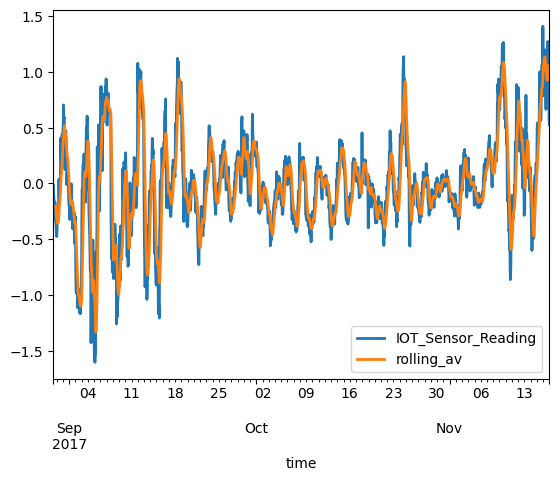

In [55]:
df['rolling_av'] = df['IOT_Sensor_Reading'].rolling(10).mean()
# take a look
df[['IOT_Sensor_Reading','rolling_av']].plot(lw=2);

RMSE: 0.24699001224659006


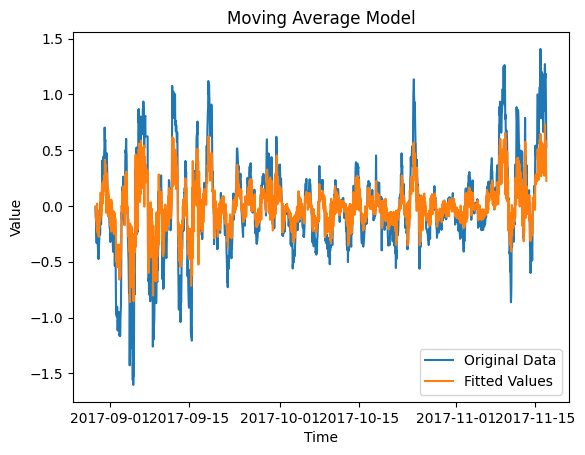

                               SARIMAX Results                                
Dep. Variable:     IOT_Sensor_Reading   No. Observations:                 1910
Model:                 ARIMA(0, 0, 1)   Log Likelihood                 -39.748
Date:                Tue, 04 Jul 2023   AIC                             85.496
Time:                        09:16:42   BIC                            102.160
Sample:                    08-29-2017   HQIC                            91.629
                         - 11-17-2017                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0033      0.010     -0.316      0.752      -0.024       0.017
ma.L1          0.8470      0.010     82.228      0.000       0.827       0.867
sigma2         0.0610      0.001     40.855      0.0

In [56]:
# Create MA model
order = (0, 0, 1)  # (p, d, q) order of the model
model = ARIMA(df['IOT_Sensor_Reading'], order=order)

# Fit the model
model_fit = model.fit()


# Get the fitted values
fitted_values = model_fit.fittedvalues

rmse = np.sqrt(mean_squared_error(df['IOT_Sensor_Reading'], fitted_values))

print(f"RMSE: {rmse}")

# Plot the original data and the fitted values
plt.plot(df['IOT_Sensor_Reading'], label='Original Data')
plt.plot(fitted_values, label='Fitted Values')
plt.legend()
plt.title('Moving Average Model')
plt.xlabel('Time')
plt.ylabel('Value')
plt.show()

# Print model summary
print(model_fit.summary())

### **Errors**

The regression line regress towards the mean to create the best fit which essentially means that the errors are at the lowest. In the above plot, it is visible that the forecast line is not able to exactly predict the true values. There is always going to be some space for errors.

Let's understand the various errors in Regression:


* The mean absolute error (MAE) is the most basic regression error statistic to grasp. We'll compute the residual for each data point individually, using only the absolute value of each so that negative and positive residuals don't cancel out. The average of all these residuals is then calculated. MAE essentially describes the typical magnitude of the residuals. <br>
$$MAE = \frac{1}{n}\sum_{i=1}^{n}|y-\hat y|$$

* The mean square error (MSE) is identical to the mean absolute error (MAE) but squares the difference before aggregating all of them. The MSE will nearly always be greater than the MAE because we are squaring the difference. Because of this, we are unable to directly compare the MAE and MSE. We are limited to comparing the error metrics of our model to those of a rival model. The presence of outliers in our data makes the square term's impact on the MSE equation very clear. In MAE, each residual adds proportionally to the overall error, whereas in MSE, the error increases quadratically. As a result, our data outliers will ultimately result in a considerably bigger total error in the MSE than they will in the MAE. Similarly to this, our model will suffer more if it predicts values that are significantly different from the matching actual value.
This means that in MSE as opposed to MAE, substantial disparities between actual and predicted values are punished more severely. <br>If we wish to limit the importance of outliers, we should use MAE because outlier residuals do not contribute as much to overall error as MSE. Finally, the decision between MSE and MAE is application-specific and depends on how large errors need to be handled.

$$MSE= \frac{1}{n}\sum_{i=1}^{n}(y-\hat y)^2$$


* The root mean squared error (RMSE) is another error statistic you may come upon. It is the square root of the MSE, as the name implies. Because the MSE is squared, its units differ from the original output. RMSE is frequently used to transform the error metric back into comparable units, making interpretation easier. Outliers have a comparable effect on the MSE and RMSE because they both square the residual.

$$RMSE= \sqrt(\frac{1}{n}\sum_{i=1}^{n}(y-\hat y)^2)$$


* The percentage counterpart of MAE is the mean absolute percentage error (MAPE). Just as MAE is the average amount of error created by your model, MAPE is the average distance between the model's predictions and their associated outputs. MAPE, like MAE, has a clear meaning because percentages are easier for people to understand. Because of the use of absolute value, MAPE and MAE are both resistant to the effects of outliers.

$$MAPE= \frac{100\%}{n}\ \sum_{i=1}^{n}\left| \frac{y-\hat y}{y} \right|$$

RMSE: 0.1867429570041833


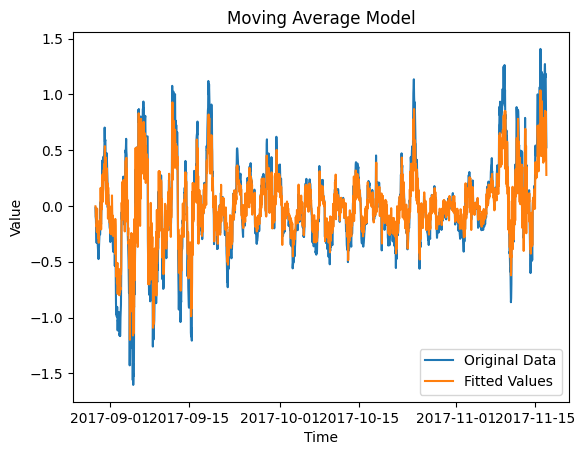

                               SARIMAX Results                                
Dep. Variable:     IOT_Sensor_Reading   No. Observations:                 1910
Model:                 ARIMA(0, 0, 2)   Log Likelihood                 494.095
Date:                Tue, 04 Jul 2023   AIC                           -980.190
Time:                        09:16:43   BIC                           -957.971
Sample:                    08-29-2017   HQIC                          -972.012
                         - 11-17-2017                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0032      0.012     -0.271      0.786      -0.026       0.020
ma.L1          1.1650      0.013     87.333      0.000       1.139       1.191
ma.L2          0.6119      0.014     43.043      0.0

In [57]:
# Create MA model
order = (0, 0, 2)  # (p, d, q) order of the model
model = ARIMA(df['IOT_Sensor_Reading'], order=order)

# Fit the model
model_fit = model.fit()

# Get the fitted values
fitted_values = model_fit.fittedvalues

rmse = np.sqrt(mean_squared_error(df['IOT_Sensor_Reading'], fitted_values))

print(f"RMSE: {rmse}")

# Plot the original data and the fitted values
plt.plot(df['IOT_Sensor_Reading'], label='Original Data')
plt.plot(fitted_values, label='Fitted Values')
plt.legend()
plt.title('Moving Average Model')
plt.xlabel('Time')
plt.ylabel('Value')
plt.show()

# Print model summary
print(model_fit.summary())

RMSE: 0.13766230330797888


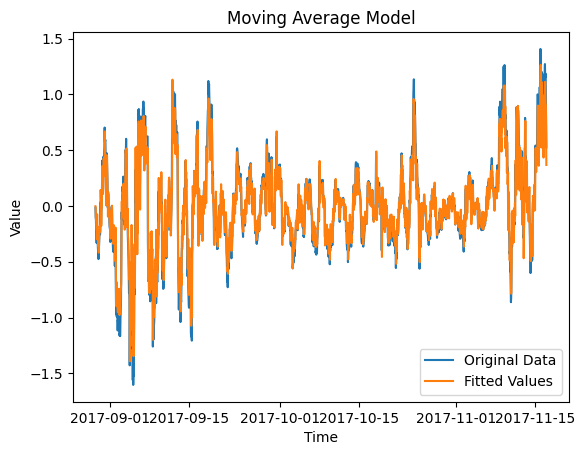

                               SARIMAX Results                                
Dep. Variable:     IOT_Sensor_Reading   No. Observations:                 1910
Model:                 ARIMA(0, 0, 5)   Log Likelihood                1076.298
Date:                Tue, 04 Jul 2023   AIC                          -2138.595
Time:                        09:16:45   BIC                          -2099.711
Sample:                    08-29-2017   HQIC                         -2124.285
                         - 11-17-2017                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0030      0.017     -0.177      0.860      -0.036       0.030
ma.L1          1.1919      0.015     77.833      0.000       1.162       1.222
ma.L2          1.1517      0.023     50.037      0.0

In [58]:
# Create MA model
order = (0, 0, 5)  # (p, d, q) order of the model
model = ARIMA(df['IOT_Sensor_Reading'], order=order)

# Fit the model
model_fit = model.fit()

# Get the fitted values
fitted_values = model_fit.fittedvalues

rmse = np.sqrt(mean_squared_error(df['IOT_Sensor_Reading'], fitted_values))

print(f"RMSE: {rmse}")

# Plot the original data and the fitted values
plt.plot(df['IOT_Sensor_Reading'], label='Original Data')
plt.plot(fitted_values, label='Fitted Values')
plt.legend()
plt.title('Moving Average Model')
plt.xlabel('Time')
plt.ylabel('Value')
plt.show()

# Print model summary
print(model_fit.summary())

## **AutoRegression Model**


Autoregressive (AR) models are a class of time series models that capture the relationship between a variable and its own past values. In an autoregressive model, the value of a variable at a given time point is linearly dependent on its past values.

Mathematically, an autoregressive model of order p, denoted as AR(p), can be expressed as:

Y(t) = c + φ1 * Y(t-1) + φ2 * Y(t-2) + ... + φp * Y(t-p) + ε(t)

where:

Y(t) represents the value of the variable at time t.
c is a constant term.
φ1, φ2, ..., φp are the autoregressive coefficients, which determine the weight or impact of each lagged value on the current value.
Y(t-1), Y(t-2), ..., Y(t-p) represent the lagged values of the variable.
ε(t) is the error term or random disturbance at time t, which captures the unexplained variation in the model.
The autoregressive coefficients (φ1, φ2, ..., φp) determine the memory or persistence of the process. A higher autoregressive order (p) implies a longer memory, as the current value depends on more past values. The constant term (c) represents the intercept or the mean of the process.

To estimate the parameters of an autoregressive model, various techniques can be employed, such as the method of least squares or maximum likelihood estimation. The model parameters are usually estimated by minimizing the sum of squared errors between the predicted values and the actual values.

The order (p) of the autoregressive model is an important consideration. It determines the number of lagged values included in the model. The appropriate order can be determined through various methods, such as visual inspection of autocorrelation and partial autocorrelation plots, information criteria (e.g., AIC, BIC), or statistical tests (e.g., Ljung-Box test).

Once the parameters are estimated, an autoregressive model can be used for forecasting. Given the past values of the variable, the model can generate predictions for future time points. The forecasted values are obtained by recursively applying the autoregressive equation.







### First order AR model

We create an AR model using the AutoReg class from statsmodels.tsa.ar_model. The lags parameter is set to 1, indicating that we are considering only one lag for the autoregressive component.

Next, we fit the model to the data using the fit() method of the AutoReg model.

We obtain the fitted values of the model using model_fit.fittedvalues, which represent the predicted values based on the AR model.

To visualize the original data and the fitted values, we plot them using plt.plot().

Finally, we print the summary of the model using model_fit.summary(), which provides information about the model coefficients, standard errors, and other diagnostic statistics.

Keep in mind that when working with AR models, it is essential to ensure that the data satisfies the assumptions of the AR model, such as stationarity and independence of residuals. Additionally, you may need to consider appropriate lag order selection based on techniques like autocorrelation and partial autocorrelation analysis


RMSE: 0.01680753814597299


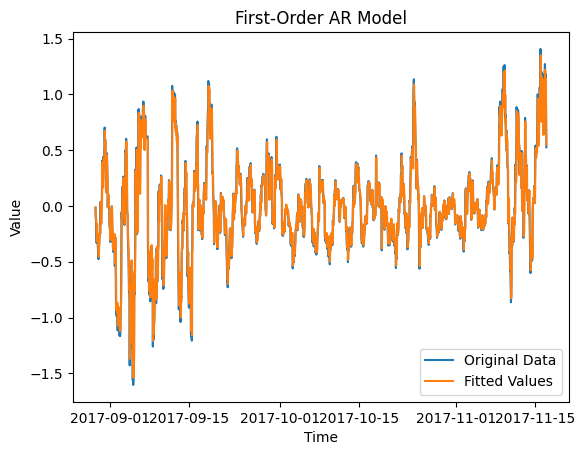

                            AutoReg Model Results                             
Dep. Variable:     IOT_Sensor_Reading   No. Observations:                 1910
Model:                     AutoReg(1)   Log Likelihood                1376.143
Method:               Conditional MLE   S.D. of innovations              0.118
Date:                Tue, 04 Jul 2023   AIC                             -4.276
Time:                        09:16:45   BIC                             -4.268
Sample:                    08-29-2017   HQIC                            -4.273
                         - 11-17-2017                                         
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
intercept                 0.0001      0.003      0.049      0.961      -0.005       0.005
IOT_Sensor_Reading.L1     0.9596      0.006    148.238      0.000       0.947       0.972
        

In [59]:
# Create AR model
order = 1  # Order of the AR model
model = AutoReg(df['IOT_Sensor_Reading'], lags=order)

# Fit the model
model_fit = model.fit()

model_snapshot("c2bf09")
# Get the fitted values
fitted_values = model_fit.fittedvalues

rmse = np.sqrt(mean_squared_error(df['IOT_Sensor_Reading'][:-1], fitted_values))

print(f"RMSE: {rmse}")


# Plot the original data and the fitted values
plt.plot(df['IOT_Sensor_Reading'], label='Original Data')
plt.plot(fitted_values, label='Fitted Values')
plt.legend()
plt.title('First-Order AR Model')
plt.xlabel('Time')
plt.ylabel('Value')
plt.show()

# Print model summary
print(model_fit.summary())

### Second order or general AR model

We specify the order of the AR model by setting the order variable to 2, indicating that we want to consider two lags in the autoregressive component.

We then create an AR model using the AutoReg class from statsmodels.tsa.ar_model, and set the lags parameter to [1, 2] to specify the lags to include in the model.

Next, we fit the model to the data using the fit() method of the AutoReg model.

We obtain the fitted values of the model using model_fit.fittedvalues, which represent the predicted values based on the AR model.

To visualize the original data and the fitted values, we plot them using plt.plot().

Finally, we print the summary of the model using model_fit.summary(), which provides information about the model coefficients, standard errors, and other diagnostic statistics.

You can adjust the order variable and the lags parameter according to your specific AR model requirements, considering the appropriate number of lags to include.

RMSE: 0.12812892138395462


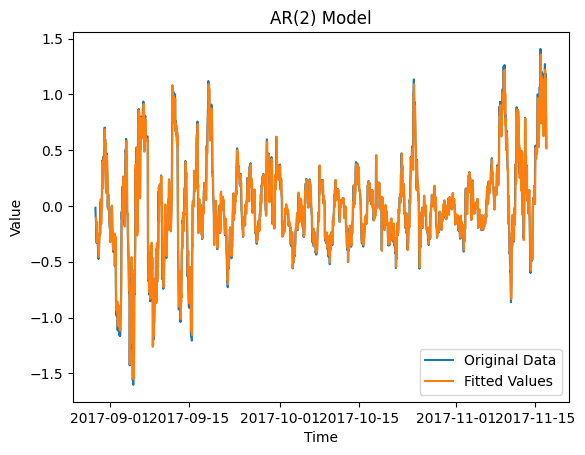

                            AutoReg Model Results                             
Dep. Variable:     IOT_Sensor_Reading   No. Observations:                 1910
Model:                     AutoReg(2)   Log Likelihood                1382.786
Method:               Conditional MLE   S.D. of innovations              0.117
Date:                Tue, 04 Jul 2023   AIC                             -4.283
Time:                        09:16:46   BIC                             -4.272
Sample:                    08-29-2017   HQIC                            -4.279
                         - 11-17-2017                                         
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
intercept                 0.0001      0.003      0.051      0.960      -0.005       0.005
IOT_Sensor_Reading.L1     1.0450      0.023     45.834      0.000       1.000       1.090
IOT_Sens

In [60]:
# Specify the order of the AR model
order = 2  # Order of the AR model

# Create AR model
model = AutoReg(df['IOT_Sensor_Reading'], lags=[1, 2])

# Fit the model
model_fit = model.fit()

# Get the fitted values
fitted_values = model_fit.fittedvalues

rmse = np.sqrt(mean_squared_error(df['IOT_Sensor_Reading'][:-2], fitted_values))

print(f"RMSE: {rmse}")

# Plot the original data and the fitted values
plt.plot(df['IOT_Sensor_Reading'], label='Original Data')
plt.plot(fitted_values, label='Fitted Values')
plt.legend()
plt.title(f'AR({order}) Model')
plt.xlabel('Time')
plt.ylabel('Value')
plt.show()

# Print model summary
print(model_fit.summary())


RMSE: 0.17536609915403986


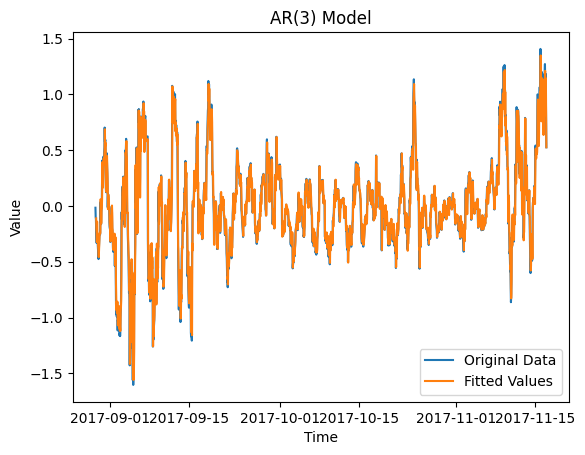

                            AutoReg Model Results                             
Dep. Variable:     IOT_Sensor_Reading   No. Observations:                 1910
Model:                     AutoReg(3)   Log Likelihood                1383.045
Method:               Conditional MLE   S.D. of innovations              0.117
Date:                Tue, 04 Jul 2023   AIC                             -4.283
Time:                        09:16:46   BIC                             -4.269
Sample:                    08-29-2017   HQIC                            -4.278
                         - 11-17-2017                                         
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
intercept                 0.0002      0.003      0.063      0.950      -0.005       0.005
IOT_Sensor_Reading.L1     1.0485      0.023     45.821      0.000       1.004       1.093
IOT_Sens

In [61]:
# Specify the order of the AR model
order = 3  # Order of the AR model

# Create AR model
model = AutoReg(df['IOT_Sensor_Reading'], lags=[1, 2, 3])

# Fit the model
model_fit = model.fit()

# Get the fitted values
fitted_values = model_fit.fittedvalues

rmse = np.sqrt(mean_squared_error(df['IOT_Sensor_Reading'][:-3], fitted_values))

print(f"RMSE: {rmse}")

# Plot the original data and the fitted values
plt.plot(df['IOT_Sensor_Reading'], label='Original Data')
plt.plot(fitted_values, label='Fitted Values')
plt.legend()
plt.title(f'AR({order}) Model')
plt.xlabel('Time')
plt.ylabel('Value')
plt.show()

# Print model summary
print(model_fit.summary())

RMSE: 0.21255342211341122


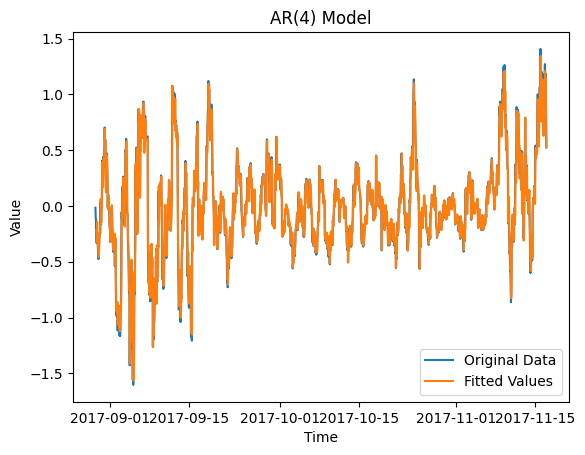

                            AutoReg Model Results                             
Dep. Variable:     IOT_Sensor_Reading   No. Observations:                 1910
Model:                     AutoReg(4)   Log Likelihood                1383.678
Method:               Conditional MLE   S.D. of innovations              0.117
Date:                Tue, 04 Jul 2023   AIC                             -4.283
Time:                        09:16:46   BIC                             -4.266
Sample:                    08-29-2017   HQIC                            -4.277
                         - 11-17-2017                                         
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
intercept                 0.0002      0.003      0.071      0.943      -0.005       0.005
IOT_Sensor_Reading.L1     1.0499      0.023     45.883      0.000       1.005       1.095
IOT_Sens

In [62]:
# Specify the order of the AR model
order = 4  # Order of the AR model

# Create AR model
model = AutoReg(df['IOT_Sensor_Reading'], lags=[1, 2, 3,4])

# Fit the model
model_fit = model.fit()


# Get the fitted values
fitted_values = model_fit.fittedvalues

rmse = np.sqrt(mean_squared_error(df['IOT_Sensor_Reading'][:-4], fitted_values))

print(f"RMSE: {rmse}")

# Plot the original data and the fitted values
plt.plot(df['IOT_Sensor_Reading'], label='Original Data')
plt.plot(fitted_values, label='Fitted Values')
plt.legend()
plt.title(f'AR({order}) Model')
plt.xlabel('Time')
plt.ylabel('Value')
plt.show()

# Print model summary
print(model_fit.summary())

## **Conclusion**

In this project, we focused on predicting the IoT sensor reading using one year's worth of time series data. Throughout the project, we followed a systematic approach to build and evaluate time series models.

We began by reading and preprocessing the data, ensuring that it was in a suitable format for analysis. We then conducted exploratory data analysis (EDA) to gain insights into the patterns, trends, and seasonality present in the data.

To proceed with modeling, we first checked the stationarity of the time series. Since the data was already stationary, we did not need to perform any differencing or transformation.

Next, we analyzed the autocorrelation and partial autocorrelation plots (ACF and PACF) to determine the order of autoregression (AR) and moving average (MA) components in our models. These plots provided valuable information about the lagged dependencies in the data.

We built several models, including moving average (MA) models and autoregressive (AR) models of different orders. The performance of these models was evaluated based on both the p-value and root mean squared error (RMSE).

After evaluating the models, we found that the AR models outperformed the MA model in terms of predictive accuracy. Among the AR models, the first order AR model showed the best performance, with lower p-values and RMSE compared to higher order AR models. This suggests that a simple AR(1) model was sufficient to capture the underlying patterns in the data.